In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import relative_path, connect_ssh_tunnel, connect_to_db

In [3]:
config_file = relative_path("config.yml")
sshtunnel_mysql = connect_ssh_tunnel(config_file, "ssh_mysql")
engine = connect_to_db(config_file, "database_mysql")

2023-03-08 20:27:34,738| ERROR   | Password is required for key /home/dakoro/.ssh/id_rsa


In [4]:

df = pd.read_sql("Select * from Result;", engine)

In [5]:
df = df.dropna()

<AxesSubplot: xlabel='grade', ylabel='Count'>

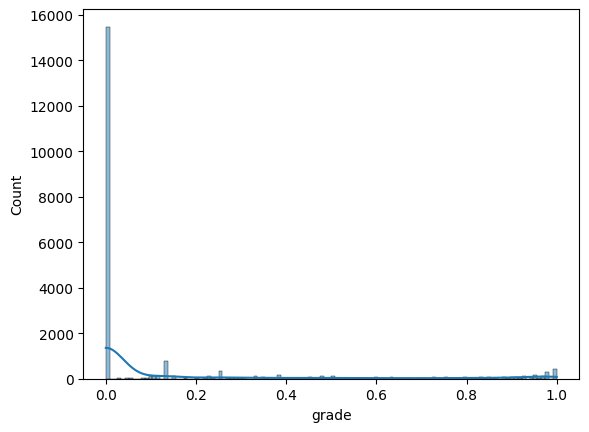

In [6]:
sns.histplot(df['grade'], kde=True)

In [7]:
df['eligibility'] = df['eligibility'].apply(get_eligibility)

NameError: name 'get_eligibility' is not defined

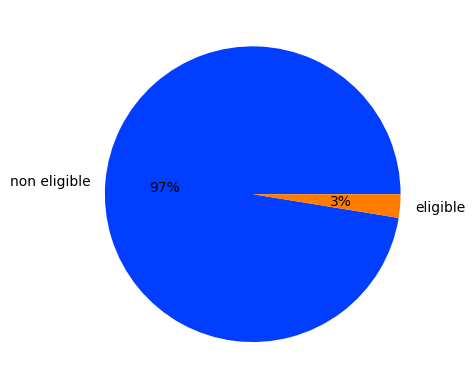

In [9]:
color = sns.color_palette('bright')
plt.pie(df['eligibility'].value_counts(),labels=['non eligible', 'eligible'], colors=color, autopct='%.0f%%')
plt.show()